In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split


In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


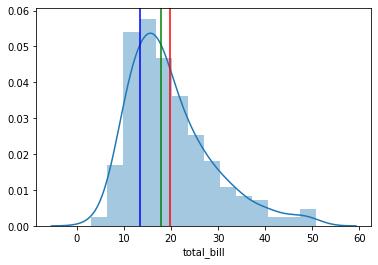

In [3]:
import statistics as stats
sns.distplot(df['total_bill'])
plt.axvline(np.mean(df['total_bill']),label='mean',color='r')
plt.axvline(np.median(df['total_bill']),label='median',color='g')
plt.axvline(stats.mode(df['total_bill']),label='mode',color='b')
plt.show()

In [4]:
Standard_deviation=df['total_bill'].std()

In [5]:
Variance=df['total_bill'].var()

In [6]:
Mean=df['total_bill'].mean()

In [7]:
Median=df['total_bill'].median()

In [8]:
Q1=df['total_bill'].quantile(0.25)
Q1

13.3475

In [9]:
Q3=df['total_bill'].quantile(0.75)
Q3

24.127499999999998

In [10]:
IQR=Q3-Q1
IQR

10.779999999999998

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df['Zscore']=(df['total_bill']-Mean)/(Standard_deviation)

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635


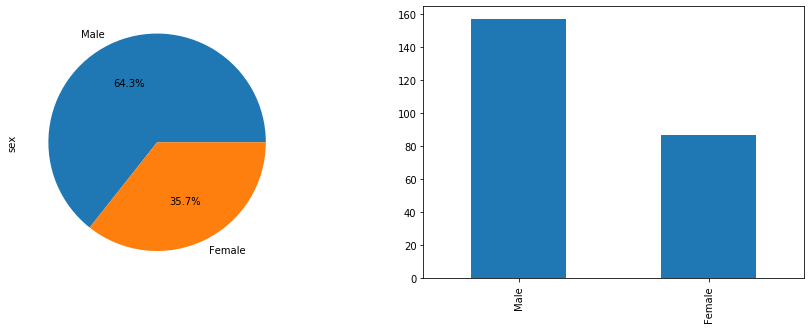

In [14]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['sex'].value_counts().plot(kind='pie',autopct="%1.1f%%",ax=ax[0])
df['sex'].value_counts().plot(kind='bar',ax=ax[1])
plt.show()

### Dealing with null values

In [15]:
df1=pd.DataFrame({'A':[1,2,np.nan,np.nan],'B':[2,3,4,np.nan],'C':[3,np.nan,np.nan,np.nan]})
df1

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN
2,NaN,4.0,NaN
3,NaN,NaN,NaN


In [16]:
df1.notnull()

,A,B,C
0,True,True,True
1,True,True,False
2,False,True,False
3,False,False,False


In [17]:
df1.dropna()

,A,B,C
0,1.0,2.0,3.0


In [18]:
df1.dropna(thresh=1,axis=0)

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN
2,NaN,4.0,NaN


In [19]:
df1.dropna(thresh=2,axis=0)

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN


In [20]:
df1.dropna(thresh=3,axis=0)

,A,B,C
0,1.0,2.0,3.0


In [21]:
df1.dropna(how='any')

,A,B,C
0,1.0,2.0,3.0


In [22]:
df1.dropna(subset=['A'])

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN


In [23]:
df1

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN
2,NaN,4.0,NaN
3,NaN,NaN,NaN


In [24]:
df1.dropna(subset=['B'])

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN
2,NaN,4.0,NaN


In [25]:
df1.dropna(subset=['C'])

,A,B,C
0,1.0,2.0,3.0


In [26]:
df1

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN
2,NaN,4.0,NaN
3,NaN,NaN,NaN


In [27]:
df1.fillna(method='bfill')

,A,B,C
0,1.0,2.0,3.0
1,2.0,3.0,NaN
2,NaN,4.0,NaN
3,NaN,NaN,NaN


In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635


### Encoding-Map,Replace,LabelEncoding,OneHotEncoding

In [29]:
df['Map Sex']=df['sex'].map({'Male':0,'Female':1})

In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore,Map Sex
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066,1
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635,1


In [31]:
df['Replace Sex']=df['sex'].replace({'Male':0,'Female':1})

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore,Map Sex,Replace Sex
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635,1,1


In [33]:
df['LE Sex']=le.fit_transform(df['sex'])

In [34]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore,Map Sex,Replace Sex,LE Sex
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066,1,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635,1,1,0


In [35]:
pd.get_dummies(data=df,columns=['size','time'],drop_first=True)

,total_bill,tip,sex,smoker,day,Zscore,Map Sex,Replace Sex,LE Sex,size_2,size_3,size_4,size_5,size_6,time_Dinner
0,16.99,1.01,Female,No,Sun,-0.314066,1,1,0,1,0,0,0,0,1
1,10.34,1.66,Male,No,Sun,-1.061054,0,0,1,0,1,0,0,0,1
2,21.01,3.50,Male,No,Sun,0.137497,0,0,1,0,1,0,0,0,1
3,23.68,3.31,Male,No,Sun,0.437416,0,0,1,1,0,0,0,0,1
4,24.59,3.61,Female,No,Sun,0.539635,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,1.038377,0,0,1,0,1,0,0,0,1
240,27.18,2.00,Female,Yes,Sat,0.830568,1,1,0,1,0,0,0,0,1
241,22.67,2.00,Male,Yes,Sat,0.323964,0,0,1,1,0,0,0,0,1
242,17.82,1.75,Male,No,Sat,-0.220833,0,0,1,1,0,0,0,0,1


### Scaling-Zscore & MinMax

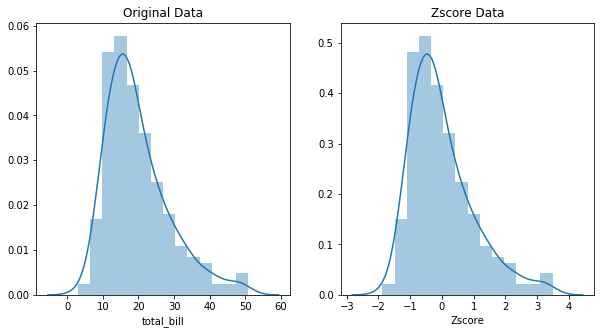

In [36]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['total_bill'],ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(df['Zscore'],ax=ax[1])
ax[1].set_title('Zscore Data')
plt.show()

In [37]:
from scipy.stats import zscore

In [38]:
df=sns.load_dataset('tips')

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df['Zscore']=zscore(df['total_bill'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [41]:
Min=df['total_bill'].min()
Max=df['total_bill'].max()

In [42]:
df['MinMaxTB']=(df['total_bill']-Min)/(Max-Min)

In [43]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore,MinMaxTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0.450775


In [44]:
print('Skew of Original Data',df['total_bill'].skew())
print('Skew of Zscore Data',df['Zscore'].skew())
print('Skew of MinMax Data',df['MinMaxTB'].skew())
print('Kurtosis of Original Data',df['total_bill'].kurt())
print('Kurtosis of Zscore Data',df['Zscore'].kurt())
print('Kurtosis of MinMax Data',df['MinMaxTB'].kurt())

Skew of Original Data 1.1332130376158205
Skew of Zscore Data 1.1332130376158205
Skew of MinMax Data 1.1332130376158203
Kurtosis of Original Data 1.2184840156638854
Kurtosis of Zscore Data 1.2184840156638836
Kurtosis of MinMax Data 1.2184840156638836


### Scaling done by Zscore,MinMax.Here we see that all are same.Hence Scaling for similar matching

### Transform-Log,SQRT-Used for Removing outliers

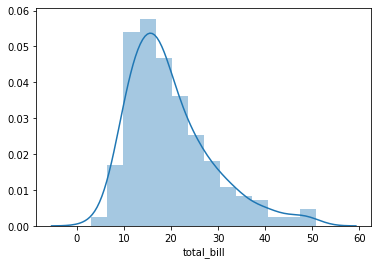

In [45]:
sns.distplot(df['total_bill'])

In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Zscore,MinMaxTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0.450775


In [47]:
df.drop(['Zscore','MixMaxTB','MinMaxTB'],axis=1,inplace=True)

KeyError: "['MixMaxTB'] not found in axis"

In [ ]:
df.head()

In [ ]:
df['SQRT TB']=df['total_bill'].apply(lambda x:np.sqrt(x))

In [ ]:
df['Log TB']=df['total_bill'].apply(lambda x:np.log(x))

In [ ]:
df.head()

In [ ]:
print('Skew of Original Data',df['total_bill'].skew())
print('Skew of SQRT TB Data',df['SQRT TB'].skew())
print('Skew of Log TB Data',df['Log TB'].skew())
print('Kurtosis of Original Data',df['total_bill'].kurt())
print('Kurtosis of SQRT Data',df['SQRT TB'].kurt())
print('Kurtosis of Log Data',df['Log TB'].kurt())

In [ ]:
f,ax=plt.subplots(1,3,figsize=(10,5))
sns.distplot(df['total_bill'],ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(df['SQRT TB'],ax=ax[1])
ax[1].set_title('SQRT Transform')
sns.distplot(df['Log TB'],ax=ax[2])
ax[2].set_title('Log Transform')
plt.show()

### Skewness-It decreases. Original>SQRT>Log
### Kurtosis- Original>Log>Kurt

## Remove Outlier-Zscore,IQR

In [ ]:
df=sns.load_dataset('tips')
df.head()

In [ ]:
df['ZTB']=zscore(df['total_bill'])

In [ ]:
df.head()

In [ ]:
df[(df['ZTB']>3)|(df['ZTB']<-3)].count()[0]

In [ ]:
df.shape

In [ ]:
df1=df[(df['ZTB']<3)&(df['ZTB']>-3)]
df1.shape

In [ ]:
Q1

In [ ]:
Q3


In [ ]:
IQR=Q3-Q1
IQR

In [ ]:
UL=Q3+1.5*IQR
UL

In [ ]:
LL=Q1-1.5*IQR
LL

In [ ]:
df[(df['total_bill']>UL)|(df['total_bill']<LL)].shape[0]

In [ ]:
df2=df[(df['total_bill']<UL)&(df['total_bill']>LL)]
df2.shape

In [ ]:
print('Skew of Original Data',df['total_bill'].skew())
print('Skew of Zscore removal',df1['total_bill'].skew())
print('Skew of IQR Removal',df2['total_bill'].skew())
print('Kurtosis of Original Data',df['total_bill'].kurt())
print('Kurtosis of Zscore removal',df1['total_bill'].kurt())
print('Kurtosis of IQR Removal',df2['total_bill'].kurt())

In [ ]:
f,ax=plt.subplots(1,3,figsize=(10,5))
sns.distplot(df['total_bill'],ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(df1['total_bill'],ax=ax[1])
ax[1].set_title('Zscore Removal')
sns.distplot(df2['total_bill'],ax=ax[2])
ax[2].set_title('IQR Removal')
plt.show()

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['total_bill'],ax=ax[0])
ax[0].set_title('Original data')
sns.boxplot(df1['total_bill'],ax=ax[1])
ax[1].set_title('Zscore cleaned data')
sns.boxplot(df2['total_bill'],ax=ax[2])
ax[2].set_title('IQR cleaned data')
plt.show()

##### Skewness-Original>ZScore>IQR
##### Kurtosis-Original>ZScore>IQR
##### IQR becomes more mesokurtic curve & better
##### Relevant 3 sigma value where all values beyond this are outliers

## Miscellaneous Insights

In [ ]:
a=df.groupby(by=['day','sex'])
b=a.count()

In [ ]:
pd.pivot_table(data=df,index='sex',columns='day',values='total_bill',aggfunc='count').plot(kind='bar')
plt.show()

In [ ]:
pd.pivot_table(data=df,index='sex',columns='day',values='total_bill',aggfunc='count').plot(kind='bar',stacked=True)
plt.show()

In [ ]:
df.head()

In [ ]:
sns.violinplot(x='day',y='tip',hue='sex',data=df)
plt.title('Day Vs Tips wrt Sex')
plt.show()

In [ ]:
sns.violinplot(x='day',y='total_bill',hue='sex',data=df)
plt.title('Day Vs TotalBill wrt Sex')
plt.show()

### Machine Learning Data Creation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df['total_bill']
y=df.drop(['total_bill'],axis=1)

In [ ]:
Y_train,Y_test,X_train,X_test=train_test_split(y,x,train_size=0.7,random_state=0)

In [ ]:
Y_train.head()

In [ ]:
X_train.head()

In [ ]:
Y_test.head()

In [ ]:
X_test.head()

### Seasonality

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


# Draw Plot
sns.lineplot(y=df['value'],x=df.index)
plt.show()

### Frequency tables

In [ ]:
one_way= pd.crosstab(index=df["Survived"],  columns="count")
print(one_way)
two_way= pd.crosstab(index=df["Survived"],  columns=df["Sex"])
two_way.index= ["died","survived"]
print(two_way)

## Scaling technique

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)As you don’t need to fit it to your test set, you can just apply transformation.sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

### Normalization-Min Max

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

#### Standardization-Zscore 

In [ ]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

##### Standardization is better than normalization as it pulls the data to a more closer range

In [ ]:
# Make a fake dataset:
h=[12,4,56,5,23]
b=['A','B','C','D','E']
ypos=np.arange(len(b))
# Create bars
plt.bar(ypos,h)
plt.title('Fake Dataset')
plt.xlabel('Categories')
plt.ylabel("Values")
# Create names on the x-axis
plt.xticks(ypos,b)
# Show graphic
plt.show()

In [ ]:
from scipy.stats import norm
from scipy.stats import skew

In [ ]:
#print percentages of females vs. males Heart Disease

a=heart.groupby(by=['sex','target'])
b=a['target'].value_counts()[1] ## Count of Females with Heart Disease
d=a['target'].value_counts()[3]## Count of Males with Heart Disease 
c=heart['sex'].value_counts()['Male']
print("Percentage of Males with Heart Disease=",(d/heart['sex'].value_counts()[0])*100,"%")
print("Percentage of Females with Heart disease=",(b/heart['sex'].value_counts()[1])*100,"%")

In [ ]:
#create crosstab
pd.crosstab(heart['sex'],heart['target']).plot(kind='bar',stacked=True)
plt.title('Sex:(0-F & 1-M) Vs Target')
plt.show()

In [ ]:
# Time series data source: 

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


# Draw Plot
sns.lineplot(y=df['value'],x=df.index)
plt.show()

In [ ]:
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df.head()

In [ ]:
train['MSSubClass_Cate']=train['MSSubClass'].astype('category')

In [ ]:
df=pd.DataFrame(np.random.randint(1,20,16).reshape(4,4),columns=['A','B','C','D'])
df

In [ ]:
E=pd.Series([10,20,30,40])

In [ ]:
df['B']=E

In [ ]:
df

In [48]:
s='2019-01-01'

In [49]:
type(s)

str

In [50]:
s.astype(datetime)

AttributeError: 'str' object has no attribute 'astype'

In [63]:
s="6'0"

In [64]:
s.split("  ' ",1)

["6'0"]

In [65]:
import re

r = re.compile(r"([0-9]+)' ([0-9]*\.?[0-9]+)\"")
def get_inches2(el):
    m = r.match(el)
         if m == None:         
            return float('NaN')
         else:
            return int(m.group(1))*12 + float(m.group(2))

IndentationError: unexpected indent (<ipython-input-65-7dcbc8df6f5e>, line 6)

In [66]:
s

"6'0"

In [70]:
a=s.replace({" ' "," . "},inplace=True)

TypeError: replace() takes no keyword arguments

In [71]:
a

"6'0"

### Missing values imputation

In [72]:
fifa.isna()

NameError: name 'fifa' is not defined

In [76]:
f='6,0'

In [81]:
f
f.split(" , ")

['6,0']

In [82]:
s='Aviraj'

In [83]:
s.split("v")

['A', 'iraj']

In [84]:
s='5 . 7'

In [89]:
s.strip(' ')

'5 . 7'

In [88]:
a


'5 . 7'

In [90]:
s='h e l l o'

In [92]:
s.strip(' ')

'h e l l o'

In [94]:
"".join(s.split())

'hello'